In [1]:
from IPython.display import display, Markdown
import numpy as np
def set_frame_style(df, caption="", font_size ='20px' ):
    random_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap=random_list[np.random.randint(1,17)]).set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Brown'),
        ('font-size', font_size),
        ('font-weight','bold')
    ]}])

# <center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:280%;text-align:center;border-radius: 9px 5px;padding : 9px">Liver Cirrhosis Survival Prediction</p>   </span></font></center> 

 <img src="https://scienceblog.com/wp-content/uploads/2014/12/HiRes.jpg" height="600" width="600" style="object-fit: cover;">


 
<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
    
Liver cirrhosis : A complication that happens with a body organ, liver. Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.

# <center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Table of contents </p>   </span></font></center> 

# Table of Contents

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
   font-size : 15px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-color :  #581845  ;        
    border: 2px solid #581845;">
 
- [About the dataset](#1)
    - [1.1 Dataset Description](#1.1)
- [2. Importing the data](#2)
    - [2.1 Columns creation](#2.1)
- [3. Exploratory Data Analysis](#3)
    - [3.1 Distribution of Features](#3.1)
    - [3.2 Insights](#3.2)
- [4. Preprocessing](#4)
    - [4.1 RobustScaler](#4.1)  
    - [4.2 One Hot Encoding](#4.2) 
- [5. Model Training](#5)
    - [5.1 XGB Classifier](#5.1)
    - [5.2 LGBM Classifier](#5.2)
    - [5.2 Neural Network](#5.3)
    - [5.3 CatBoost Classifier](#5.4)
    - [5.4  Hyperparameter Optimization](#5.5)
    - [5.5 Ensemble(XGB, LGBM, CatBoost](#5.6)
- [6. Model Inference](#6)
    - [6.1 Feature Importance](#6.1) 
 <\div>

# <a id="1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">About the dataset </p>   </span></font></center> 

# About the dataset

<div style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;
">
   
- We need to use  17 (clinical) features to predict survival of patient with liver 
- 3 classes : 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation)
 > - Class 0 (D): The patient didn't survived.
> - Class 1 (C): The patient is censored, meaning that the observation period ended without the event (death) occurring. This means patient still being alive at the time of studyinh this.
> - Class 2 (CL): Similar to Class 1, the patient is censored, but the reason for censorship is specifically due to liver transplantation.
- Was there any data preprocessing performed? yes
> - Dropped all the rows where missing values (NA) were present in the `Drug` column
> - Imputed missing values with mean results
> - One-hot encoded for all category attributes




# <a id="1.1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 5px">Dataset Description </p>   </span></font></center> 

## Dataset Description

  <img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2003977%2F4465d9311ccae2f9ccb057fc7e14f26f%2FScreenshot%20from%202023-10-18%2009-42-52.png?generation=1697586187040332&alt=media" height="600" width="600" style="object-fit: cover;">



# <a id="2"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Importing the data </p>   </span></font></center> 

#  💽 Importing the data

In [2]:
import pandas as pd
syn_df= pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
original_df = pd.read_csv('/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
ids = test_df['id']
display(syn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

None

In [3]:
syn_df.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [4]:
original_df.Status.value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

In [5]:
display(pd.DataFrame(syn_df.isna().value_counts()))

,,,,,,,,,,,,,,,,,,,,count
id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7905


In [6]:
original_df.columns = ['id', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']

In [7]:
set_frame_style(syn_df.head(),'Synthetically Generated Data\n')

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.300000,316.000000,3.350000,172.000000,1601.000000,179.800000,63.000000,394.000000,9.700000,3.000000,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.900000,364.000000,3.540000,63.000000,1440.000000,134.850000,88.000000,361.000000,11.000000,3.000000,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.300000,299.000000,3.550000,131.000000,1029.000000,119.350000,50.000000,199.000000,11.700000,4.000000,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.600000,256.000000,3.500000,58.000000,1653.000000,71.300000,96.000000,269.000000,10.700000,3.000000,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.100000,346.000000,3.650000,63.000000,1181.000000,125.550000,96.000000,298.000000,10.600000,4.000000,C


In [8]:
set_frame_style(original_df.head(),'Original Data\n')

,id,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.100000,302.000000,4.140000,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.400000,176.000000,3.480000,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.800000,244.000000,2.540000,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.400000,279.000000,3.530000,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000


In [9]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(syn_df.columns) :
    nunique =syn_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)

Unique values in synthetically generated dataset : 

+---------------+---------------+
|    Features   | Unique Values |
+---------------+---------------+
|       id      |      7905     |
|     N_Days    |      461      |
|      Drug     |       2       |
|      Age      |      391      |
|      Sex      |       2       |
|    Ascites    |       2       |
|  Hepatomegaly |       2       |
|    Spiders    |       2       |
|     Edema     |       3       |
|   Bilirubin   |      111      |
|  Cholesterol  |      226      |
|    Albumin    |      160      |
|     Copper    |      171      |
|    Alk_Phos   |      364      |
|      SGOT     |      206      |
| Tryglicerides |      154      |
|   Platelets   |      227      |
|  Prothrombin  |       49      |
|     Stage     |       4       |
|     Status    |       3       |
+---------------+---------------+


## `Drug`, `Sex` , `Ascites`, ` Hepatomegaly`, `Spiders`, `Edema`, and `Stage` are the categorical features

In [10]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(original_df.columns) :
    nunique =original_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+---------------+---------------+
|    Features   | Unique Values |
+---------------+---------------+
|       id      |      418      |
|     N_Days    |      399      |
|     Status    |       3       |
|      Drug     |       2       |
|      Age      |      344      |
|      Sex      |       2       |
|    Ascites    |       2       |
|  Hepatomegaly |       2       |
|    Spiders    |       2       |
|     Edema     |       3       |
|   Bilirubin   |       98      |
|  Cholesterol  |      201      |
|    Albumin    |      154      |
|     Copper    |      158      |
|    Alk_Phos   |      295      |
|      SGOT     |      179      |
| Tryglicerides |      146      |
|   Platelets   |      243      |
|  Prothrombin  |       48      |
|     Stage     |       4       |
+---------------+---------------+


 > ### Both are similar (of course it was synthetically generated from the original one, but it's a good practice to check when merging both dataframes)

In [11]:
df = pd.concat([syn_df,original_df], axis =0)

df = df.dropna()
df = df.sample(frac = 1).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8181 non-null   int64  
 1   N_Days         8181 non-null   int64  
 2   Drug           8181 non-null   object 
 3   Age            8181 non-null   int64  
 4   Sex            8181 non-null   object 
 5   Ascites        8181 non-null   object 
 6   Hepatomegaly   8181 non-null   object 
 7   Spiders        8181 non-null   object 
 8   Edema          8181 non-null   object 
 9   Bilirubin      8181 non-null   float64
 10  Cholesterol    8181 non-null   float64
 11  Albumin        8181 non-null   float64
 12  Copper         8181 non-null   float64
 13  Alk_Phos       8181 non-null   float64
 14  SGOT           8181 non-null   float64
 15  Tryglicerides  8181 non-null   float64
 16  Platelets      8181 non-null   float64
 17  Prothrombin    8181 non-null   float64
 18  Stage   

# <a id="2.1"></a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Columns creation/ Feature Engineering</p>   </span></font></center>  

# 💻 Feature Engineering

### Based on the normal levels of these features in body, we have created several categorical columns and will observe their effect

In [12]:
def convert_days_to_years(age_in_days):
    days_in_year = 365.25
    age_in_years = age_in_days / days_in_year
    return age_in_years


def add_cols(df):
        age = list(df.Age)
        age_in_year = []
        for i in age :
            age_in_year.append(int(convert_days_to_years(i)))
        df['Age_in_year'] = pd.Series(age_in_year)
        return df
df = add_cols(df)
test_df = add_cols(test_df)
original_df = add_cols(original_df)
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year
0,4894,788,Placebo,22306,F,N,Y,N,N,2.000000,390.000000,3.700000,52.000000,1273.000000,184.450000,194.000000,318.000000,10.800000,4.000000,C,61
1,2783,2365,Placebo,16300,F,N,Y,N,N,0.400000,242.000000,3.670000,34.000000,1164.000000,70.000000,86.000000,225.000000,9.600000,2.000000,C,44
2,6739,1785,Placebo,20449,F,N,N,N,N,0.700000,298.000000,3.850000,63.000000,1083.000000,80.600000,91.000000,252.000000,11.200000,3.000000,C,55
3,696,2713,D-penicillamine,19544,F,N,N,N,N,1.100000,257.000000,3.740000,43.000000,1080.000000,106.950000,73.000000,128.000000,10.600000,3.000000,C,53
4,4592,3059,Placebo,15601,F,N,Y,N,N,1.300000,260.000000,3.690000,73.000000,2176.000000,173.600000,70.000000,156.000000,9.900000,3.000000,C,42


<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;
">
Thrombocytopenia Indicator
    
- Thrombocytopenia Indicator is a binary measure.
- It flags low platelet counts in blood.
- Presence (1) indicates thrombocytopenia.
- Absence (0) denotes normal platelet levels.
- Useful for health assessments.
    

In [13]:
threshold_platelets = 150
df['thrombocytopenia'] = np.where(df['Platelets'] < threshold_platelets, 1, 0)
test_df['thrombocytopenia'] = np.where(test_df['Platelets'] < threshold_platelets, 1, 0)

#### Elevated Alkaline Phosphatase Indicator:
Creating a binary indicator for elevated alkaline phosphatase based on a threshold.

In [14]:
threshold_alk_phos_upper = 147  # Upper limit of normal range
threshold_alk_phos_lower = 44   # Lower limit of normal range

df['elevated_alk_phos'] = np.where((df['Alk_Phos'] > threshold_alk_phos_upper) | (df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)
test_df['elevated_alk_phos'] = np.where((test_df['Alk_Phos'] > threshold_alk_phos_upper) | (test_df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)

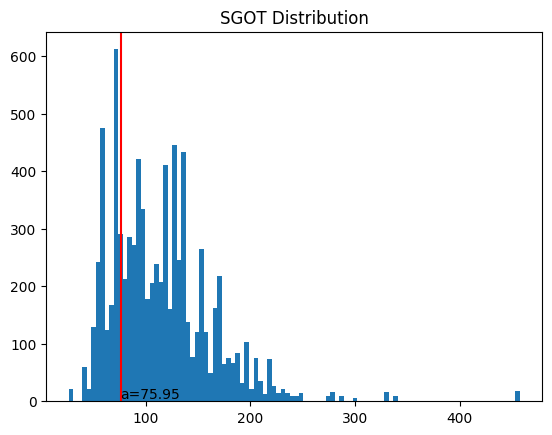

In [15]:
import matplotlib.pyplot as plt

plt.hist(df.SGOT, bins =100) 
plt.title('SGOT Distribution')
a = np.percentile(df.SGOT.values, 25)
plt.axvline(a, color = 'red')
plt.text(a, 0, f'a={a:.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
plt.show()

#### Normal copper levels

In [16]:
normal_copper_range = (62, 140)

df['normal_copper'] = np.where((df['Copper'] >= normal_copper_range[0]) & (df['Copper'] <= normal_copper_range[1]), 1, 0)
test_df['normal_copper'] = np.where((test_df['Copper'] >= normal_copper_range[0]) & (test_df['Copper'] <= normal_copper_range[1]), 1, 0)

#### Normal SGOT

In [17]:
normal_sgot_range = (8,45)
df['normal_sgot'] = np.where((df['SGOT'] >= normal_sgot_range[0]) & (df['SGOT'] <= normal_sgot_range[1]), 1, 0)
test_df['normal_sgot'] = np.where((test_df['SGOT'] >= normal_sgot_range[0]) & (test_df['SGOT'] <= normal_sgot_range[1]), 1, 0)

#### Prothrombin Time: 9.4 to 12.5 seconds.

In [18]:
normal_p_time = (9.4,12.5)
df['normal_p_time'] = np.where((df['Prothrombin'] >= normal_p_time[0]) & (df['Prothrombin'] <= normal_p_time[1]), 1, 0)
test_df['normal_p_time'] = np.where((test_df['Prothrombin'] >= normal_p_time[0]) & (test_df['Prothrombin'] <= normal_p_time[1]), 1, 0)

#### Normal Albumin Range is between  (3.4, 5.4)


In [19]:
normal_albumin_range = (3.4, 5.4)

df['normal_albumin'] = np.where((df['Albumin'] >= normal_albumin_range[0]) & (df['Albumin'] <= normal_albumin_range[1]), 1, 0)

test_df['normal_albumin'] = np.where((test_df['Albumin'] >= normal_albumin_range[0]) & (test_df['Albumin'] <= normal_albumin_range[1]), 1, 0)

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;
">
    
#### Normal bilirubin levels
Normal bilirubin levels depend on age, gender, and health. For adults, normal levels are usually between 0.2 and 1.2 milligrams per deciliter
    

In [20]:
normal_bilirubin_range = (0.2, 1.2)

df['normal_bilirubin'] = np.where((df['Bilirubin'] >= normal_bilirubin_range[0]) & (df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)
test_df['normal_bilirubin'] = np.where((test_df['Bilirubin'] >= normal_bilirubin_range[0]) & (test_df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)

### Diagnosis Days

In [21]:
df['DiagnosisDays'] = df['Age'] - df['N_Days']
test_df['DiagnosisDays'] = test_df['Age'] - test_df['N_Days']

### Age Groups

In [22]:
df['Age_Group'] = pd.cut(df['Age_in_year'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')
test_df['Age_Group'] = pd.cut(test_df['Age_in_year'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')

### Bilirubin-Albumin

In [23]:
df['Bilirubin_Albumin'] =df['Bilirubin'] *df['Albumin']
test_df['Bilirubin_Albumin'] =test_df['Bilirubin'] *test_df['Albumin']

In [24]:
display(df)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,thrombocytopenia,elevated_alk_phos,normal_copper,normal_sgot,normal_p_time,normal_albumin,normal_bilirubin,DiagnosisDays,Age_Group,Bilirubin_Albumin
0,4894,788,Placebo,22306,F,N,Y,N,N,2.0,...,0,1,0,0,1,1,0,21518,2,7.400
1,2783,2365,Placebo,16300,F,N,Y,N,N,0.4,...,0,1,0,0,1,1,1,13935,1,1.468
2,6739,1785,Placebo,20449,F,N,N,N,N,0.7,...,0,1,1,0,1,1,1,18664,2,2.695
3,696,2713,D-penicillamine,19544,F,N,N,N,N,1.1,...,1,1,0,0,1,1,1,16831,2,4.114
4,4592,3059,Placebo,15601,F,N,Y,N,N,1.3,...,0,1,1,0,1,1,0,12542,1,4.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,630,1790,Placebo,24621,F,N,Y,N,N,0.6,...,0,1,0,0,1,1,1,22831,3,2.166
8177,5252,1908,D-penicillamine,23241,F,N,Y,Y,N,1.5,...,0,1,1,0,1,1,0,21333,2,5.775
8178,6229,790,Placebo,13178,F,N,Y,N,N,11.4,...,0,1,1,0,1,0,0,12388,1,37.734
8179,5214,2033,Placebo,12398,F,N,N,N,N,0.4,...,0,1,0,0,1,1,1,10365,1,1.452


### Symptom Score

In [25]:
symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders']
df['Symptom_Score'] = df[symptom_columns].sum(axis=1)
test_df['Symptom_Score'] = test_df[symptom_columns].sum(axis=1)

### Liver Function

In [26]:
liver_columns = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']
df['Liver_Function_Index'] = df[liver_columns].mean(axis=1)
test_df['Liver_Function_Index'] = test_df[liver_columns].mean(axis=1)

### RiskScore

In [27]:
df['Risk_Score'] = df['Bilirubin'] + df['Albumin'] - df['Alk_Phos']
test_df['Risk_Score'] = test_df['Bilirubin'] + test_df['Albumin'] - test_df['Alk_Phos']

### Time Features

In [28]:
df['Diag_Year'] = (df['N_Days'] / 365).astype(int)
df['Diag_Month'] = ((df['N_Days'] % 365) / 30).astype(int)
test_df['Diag_Year'] = (test_df['N_Days'] / 365).astype(int)
test_df['Diag_Month'] = ((test_df['N_Days'] % 365) / 30).astype(int)

In [29]:
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year,thrombocytopenia,elevated_alk_phos,normal_copper,normal_sgot,normal_p_time,normal_albumin,normal_bilirubin,DiagnosisDays,Age_Group,Bilirubin_Albumin,Symptom_Score,Liver_Function_Index,Risk_Score,Diag_Year,Diag_Month
0,4894,788,Placebo,22306,F,N,Y,N,N,2.000000,390.000000,3.700000,52.000000,1273.000000,184.450000,194.000000,318.000000,10.800000,4.000000,C,61,0,1,0,0,1,1,0,21518,2,7.400000,NYN,365.787500,-1267.300000,2,1
1,2783,2365,Placebo,16300,F,N,Y,N,N,0.400000,242.000000,3.670000,34.000000,1164.000000,70.000000,86.000000,225.000000,9.600000,2.000000,C,44,0,1,0,0,1,1,1,13935,1,1.468000,NYN,309.517500,-1159.930000,6,5
2,6739,1785,Placebo,20449,F,N,N,N,N,0.700000,298.000000,3.850000,63.000000,1083.000000,80.600000,91.000000,252.000000,11.200000,3.000000,C,55,0,1,1,0,1,1,1,18664,2,2.695000,NNN,292.037500,-1078.450000,4,10
3,696,2713,D-penicillamine,19544,F,N,N,N,N,1.100000,257.000000,3.740000,43.000000,1080.000000,106.950000,73.000000,128.000000,10.600000,3.000000,C,53,1,1,0,0,1,1,1,16831,2,4.114000,NNN,297.947500,-1075.160000,7,5
4,4592,3059,Placebo,15601,F,N,Y,N,N,1.300000,260.000000,3.690000,73.000000,2176.000000,173.600000,70.000000,156.000000,9.900000,3.000000,C,42,0,1,1,0,1,1,0,12542,1,4.797000,NYN,588.647500,-2171.010000,8,4


In [30]:
display(df.shape, test_df.shape)

(8181, 36)

(5271, 35)

In [31]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(df.columns) :
    nunique =df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+----------------------+---------------+
|       Features       | Unique Values |
+----------------------+---------------+
|          id          |      7905     |
|        N_Days        |      461      |
|         Drug         |       2       |
|         Age          |      391      |
|         Sex          |       2       |
|       Ascites        |       2       |
|     Hepatomegaly     |       2       |
|       Spiders        |       2       |
|        Edema         |       3       |
|      Bilirubin       |      111      |
|     Cholesterol      |      226      |
|       Albumin        |      160      |
|        Copper        |      171      |
|       Alk_Phos       |      364      |
|         SGOT         |      206      |
|    Tryglicerides     |      154      |
|      Platelets       |      227      |
|     Prothrombin      |       49      |
|        Stage         |       4       |
|        Status        |       3       |
|     Age_in_year  

# <a id="3"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">EDA </p>   </span></font></center> 
    

# 📊 Exploratory Data Analysis

In [32]:
numeric_cols= ['N_Days',  'Age',  'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Risk_Score', 'Liver_Function_Index', 'DiagnosisDays' ,'Bilirubin_Albumin','Diag_Year','Diag_Month','Age_in_year']
original_cols = ['N_Days',  'Age',  'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
test_to_scale = test_df[numeric_cols]
train_to_scale = df[numeric_cols]
set_frame_style(train_to_scale.head(), 'Features with continuous values')
train_to_scale_original = original_df[original_cols]

## <a id="3.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Distributions of Features </p>   </span></font></center> 

# 📈 Feature Distribution

In [33]:
from plotly.subplots import make_subplots
import random
import plotly.graph_objects as go
columns = list(train_to_scale_original.columns)
ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
fig = make_subplots(rows=len(columns), cols=2)
count = 0
for row in range(int(len(columns))) : 
    random_col = f"RGB({random.randint(100, 255)}, {random.randint(100, 255)}, {random.randint(150, 255)})"
    fig.add_trace(go.Violin(y=train_to_scale[numeric_cols][columns[count]], x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 1)
    fig.add_trace(go.Violin(y= train_to_scale_original[columns[count]],x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 2)
 
    
    count +=1


fig.update_layout(height=2600, width=1000, title_text="Feature Distribution in Synthetic (Left) vs Original Dataset (Right)",showlegend=False,paper_bgcolor= '#F5F5F5')
fig.show()


<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;
">
    
### There are not much difference in the synthetically generated data and original data. Moreover, there are some characteristic features of both the distribution : 
> -   Tryglicerides has some outliers as q3 is 139 but the ax goes upto 598 : We need to use RobustScaler on it, that confines it in IQR
> -   Similarly, Alk_Phos also has many outliers that needs to be rescaled using RobustScaler
> -   Same for Cholestrol, Bilirubin and Prothrombin



In [34]:
set_frame_style(pd.DataFrame(df.Status.value_counts()), 'Data points per class', '15px')

,count
Status,
C,5112
D,2776
CL,293


In [35]:
classes = list(df.Status.unique())

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
def col_per_class(col):
    fig = go.Figure()
    for clas in classes : 
        fig.add_trace(go.Violin(y = df[col][df['Status']== clas],   box_visible=True,
                            meanline_visible=True , x = df['Status'][df['Status'] == clas], name = clas ))
        fig.update_layout(title = f'Distribution for {col} for each class', plot_bgcolor = ultra_light_colors[np.random.randint(1,10)],paper_bgcolor= '#F5F5F5', height=400,  
        width=1000 )
    return fig
for i in train_to_scale : 
    fig = col_per_class(i)
    fig.show()

## <a id="3.2"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Insights </p>   </span></font></center> 

# 💡Insights

<div class="anchor" id="top" style="
    margin-right: auto; 
    margin-left: auto;
    padding: 10px;
    background-color: #FFF7FD;
    border-radius: 2px;
    font-size : 15px;       
    font-color : #581845;                                    
    border: 2px solid #581845;
">

### Number of data points per class are imbalanced : 
>- C : 4965
>- D : 2665
>- CL: 275
    
### N_days : Number of days between the registration and earlier of death, transplantation or study analysis time :
> Class `D` is slighly on the lower side because most of them died before the study was closed. Similar is the situation with liver transpalnt individuals. Whereas for the `censored` patients, the study went on as most likely they survived or were not trackable.
### Age  
> The data shows that it mostly occures in 40+ years of age people, with death occuring mostly in higher aged people, and most of them get their liver transplants before 50
### Bilirubin : More serum bilirubin in blood, more is the complications with the liver
> People who dies most probably had severe damage indicated by the higher level of bilirubin. The censored ones have less bilirubin levels indicating most of them were in control (not much damage). People who needed liver transplant also show higher levels
### Albumin : albumin production decreases due to impaired liver function.
> This can be observed for the patient who didn't survived as their albumin levels dropped as compared to censored or the people with lover transplant
### Copper : Copper metabolism can be disrupted in Cirrosis, leading to its accumulation in the liver
> This can be seen by observing the median of the copper content in patients who didn't survived
### Alk_Phos (Alkaline Phosphatase) : Its levels may elevate due to bile duct obstruction or cholestasis, common in cirrhosis
> The median is quite high in `D` and `CL` patients
### Serum Glutamic Oxaloacetic Transaminase (SGOT) : SGOT levels may rise, indicating liver cell damage
> The median is quite high in `D` and `CL` patients
### Triglycerides: Triglyceride levels may increase due to compromised liver function
> The median is slightly high in `D` and `CL` patients
### Platelets: Platelet count often decreases as cirrhosis progresses
> It is significanly less in the people who didn't survived
### Prothrombin Time (PT): Prothrombin time, a measure of blood clotting, can be prolonged in cirrhosis due to decreased synthesis of clotting factors by the liver
> Again,significanly high in the people who didn't survived

### Based on above discussions, It seems like Patients in D category are very much differnt than C and CL class category patients. It'd be easier to differentiate D from C and CL. Challenging part is accurately determining the CL class patients and differentiating them from C class patients


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3



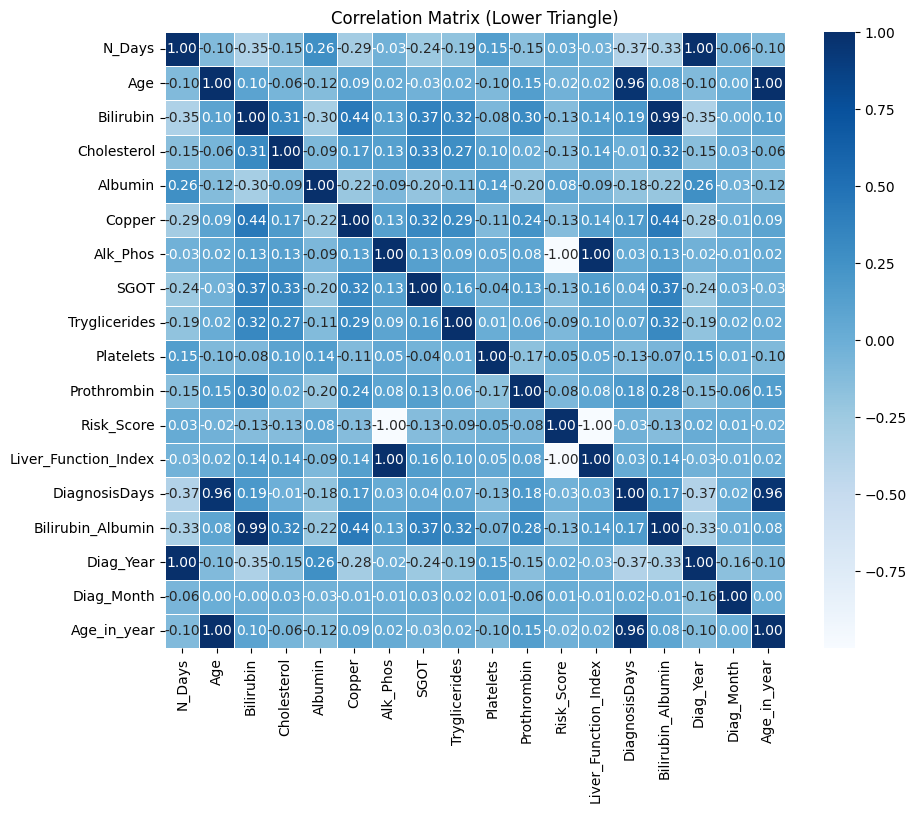

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_to_scale.corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

- ### Removing the correlated columns (Mostly are the Engineered ones), very necessary to reduce overfitting

In [37]:
train_to_scale = train_to_scale.drop(['DiagnosisDays', 'Bilirubin_Albumin', 'Diag_Year','Risk_Score', 'Liver_Function_Index'],axis =1)
test_to_scale = test_to_scale.drop(['DiagnosisDays', 'Bilirubin_Albumin', 'Diag_Year','Risk_Score', 'Liver_Function_Index'],axis =1)

# <a id="4"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Preprocessing</p>   </span></font></center> 

# ⚙️ Preprocessing

In [38]:
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year,thrombocytopenia,elevated_alk_phos,normal_copper,normal_sgot,normal_p_time,normal_albumin,normal_bilirubin,DiagnosisDays,Age_Group,Bilirubin_Albumin,Symptom_Score,Liver_Function_Index,Risk_Score,Diag_Year,Diag_Month
0,4894,788,Placebo,22306,F,N,Y,N,N,2.000000,390.000000,3.700000,52.000000,1273.000000,184.450000,194.000000,318.000000,10.800000,4.000000,C,61,0,1,0,0,1,1,0,21518,2,7.400000,NYN,365.787500,-1267.300000,2,1
1,2783,2365,Placebo,16300,F,N,Y,N,N,0.400000,242.000000,3.670000,34.000000,1164.000000,70.000000,86.000000,225.000000,9.600000,2.000000,C,44,0,1,0,0,1,1,1,13935,1,1.468000,NYN,309.517500,-1159.930000,6,5
2,6739,1785,Placebo,20449,F,N,N,N,N,0.700000,298.000000,3.850000,63.000000,1083.000000,80.600000,91.000000,252.000000,11.200000,3.000000,C,55,0,1,1,0,1,1,1,18664,2,2.695000,NNN,292.037500,-1078.450000,4,10
3,696,2713,D-penicillamine,19544,F,N,N,N,N,1.100000,257.000000,3.740000,43.000000,1080.000000,106.950000,73.000000,128.000000,10.600000,3.000000,C,53,1,1,0,0,1,1,1,16831,2,4.114000,NNN,297.947500,-1075.160000,7,5
4,4592,3059,Placebo,15601,F,N,Y,N,N,1.300000,260.000000,3.690000,73.000000,2176.000000,173.600000,70.000000,156.000000,9.900000,3.000000,C,42,0,1,1,0,1,1,0,12542,1,4.797000,NYN,588.647500,-2171.010000,8,4


# <a id="4.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">Standard Scaler</p>   </span></font></center> 
> ###  It focuses only on the IQR for scaling unless specified/changed
    

# Robustscaler

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Assuming train_to_scale and test_to_scale are your DataFrames
scaled_train = pd.DataFrame(sc.fit_transform(train_to_scale), columns=train_to_scale.columns)
scaled_test = pd.DataFrame(sc.transform(test_to_scale), columns=test_to_scale.columns)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [40]:
set_frame_style(scaled_train.head())

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Diag_Month,Age_in_year
0,-1.133088,1.068863,-0.161143,0.196804,0.438524,-0.425029,-0.287666,1.415906,1.477148,0.603372,0.211196,-1.301321,1.111866
1,0.307418,-0.560866,-0.577383,-0.555060,0.352393,-0.660634,-0.344695,-0.914937,-0.559396,-0.457624,-1.306745,-0.164402,-0.573217
2,-0.222381,0.564966,-0.499338,-0.270571,0.869180,-0.281048,-0.387075,-0.699061,-0.465111,-0.149593,0.717177,1.256746,0.517131
3,0.625298,0.319394,-0.395278,-0.478857,0.553366,-0.542831,-0.388644,-0.162428,-0.804535,-1.564255,-0.041794,-0.164402,0.318886
4,0.941351,-0.750539,-0.343248,-0.463617,0.409814,-0.150157,0.184789,1.194939,-0.861106,-1.244815,-0.927260,-0.448632,-0.771462


In [41]:
train_ohe = df.drop(numeric_cols, axis =1)
train_to_ohe = train_ohe.drop(['id','Status'], axis =1)
test_ohe = test_df.drop(numeric_cols, axis =1)
test_to_ohe = test_ohe.drop(['id'],axis =1)
set_frame_style(train_to_ohe.head())

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,thrombocytopenia,elevated_alk_phos,normal_copper,normal_sgot,normal_p_time,normal_albumin,normal_bilirubin,Age_Group,Symptom_Score
0,Placebo,F,N,Y,N,N,4.000000,0,1,0,0,1,1,0,2,NYN
1,Placebo,F,N,Y,N,N,2.000000,0,1,0,0,1,1,1,1,NYN
2,Placebo,F,N,N,N,N,3.000000,0,1,1,0,1,1,1,2,NNN
3,D-penicillamine,F,N,N,N,N,3.000000,1,1,0,0,1,1,1,2,NNN
4,Placebo,F,N,Y,N,N,3.000000,0,1,1,0,1,1,0,1,NYN


In [42]:
set_frame_style(test_to_ohe.head())

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,thrombocytopenia,elevated_alk_phos,normal_copper,normal_sgot,normal_p_time,normal_albumin,normal_bilirubin,Age_Group,Symptom_Score
0,D-penicillamine,F,N,Y,N,N,2.000000,0,1,1,0,1,0,1,2,NYN
1,D-penicillamine,F,N,N,N,N,2.000000,0,1,1,0,1,1,1,1,NNN
2,Placebo,F,N,Y,N,Y,4.000000,0,1,0,0,0,0,0,1,NYN
3,D-penicillamine,F,N,N,N,N,2.000000,0,1,0,0,1,1,1,2,NNN
4,D-penicillamine,F,N,Y,N,N,1.000000,0,1,1,0,1,0,0,2,NYN


## <a id="4.2"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">One-hot encoding the categorical columns</p>   </span></font></center> 

# One-hot Encoding

In [43]:
ohe_train = pd.get_dummies(train_to_ohe, columns =train_to_ohe.columns )
ohe_test  = pd.get_dummies(test_to_ohe, columns = train_to_ohe.columns)
ohe_train = ohe_train.replace({True: 1, False: 0})
ohe_test = ohe_test.replace({True: 1, False: 0})
set_frame_style(ohe_train.head())

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,thrombocytopenia_0,thrombocytopenia_1,elevated_alk_phos_1,normal_copper_0,normal_copper_1,normal_sgot_0,normal_sgot_1,normal_p_time_0,normal_p_time_1,normal_albumin_0,normal_albumin_1,normal_bilirubin_0,normal_bilirubin_1,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Symptom_Score_NNN,Symptom_Score_NNY,Symptom_Score_NYN,Symptom_Score_NYY,Symptom_Score_YNN,Symptom_Score_YNY,Symptom_Score_YYN,Symptom_Score_YYY
0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0


## <a><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:200%;text-align:center;border-radius:5px 5px;padding : 2px">Join the scaled and one-hot encoded columns</p>   </span></font></center> 

In [44]:
train_df_1 = pd.concat([ohe_train, scaled_train], axis =1)
test_df = pd.concat([ohe_test, scaled_test], axis =1)
set_frame_style(train_df_1.head())

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,thrombocytopenia_0,thrombocytopenia_1,elevated_alk_phos_1,normal_copper_0,normal_copper_1,normal_sgot_0,normal_sgot_1,normal_p_time_0,normal_p_time_1,normal_albumin_0,normal_albumin_1,normal_bilirubin_0,normal_bilirubin_1,Age_Group_0,Age_Group_1,Age_Group_2,Age_Group_3,Symptom_Score_NNN,Symptom_Score_NNY,Symptom_Score_NYN,Symptom_Score_NYY,Symptom_Score_YNN,Symptom_Score_YNY,Symptom_Score_YYN,Symptom_Score_YYY,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Diag_Month,Age_in_year
0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.133088,1.068863,-0.161143,0.196804,0.438524,-0.425029,-0.287666,1.415906,1.477148,0.603372,0.211196,-1.301321,1.111866
1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.307418,-0.560866,-0.577383,-0.555060,0.352393,-0.660634,-0.344695,-0.914937,-0.559396,-0.457624,-1.306745,-0.164402,-0.573217
2,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,-0.222381,0.564966,-0.499338,-0.270571,0.869180,-0.281048,-0.387075,-0.699061,-0.465111,-0.149593,0.717177,1.256746,0.517131
3,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0.625298,0.319394,-0.395278,-0.478857,0.553366,-0.542831,-0.388644,-0.162428,-0.804535,-1.564255,-0.041794,-0.164402,0.318886
4,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.941351,-0.750539,-0.343248,-0.463617,0.409814,-0.150157,0.184789,1.194939,-0.861106,-1.244815,-0.927260,-0.448632,-0.771462


In [45]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Drug_D-penicillamine  8181 non-null   int64  
 1   Drug_Placebo          8181 non-null   int64  
 2   Sex_F                 8181 non-null   int64  
 3   Sex_M                 8181 non-null   int64  
 4   Ascites_N             8181 non-null   int64  
 5   Ascites_Y             8181 non-null   int64  
 6   Hepatomegaly_N        8181 non-null   int64  
 7   Hepatomegaly_Y        8181 non-null   int64  
 8   Spiders_N             8181 non-null   int64  
 9   Spiders_Y             8181 non-null   int64  
 10  Edema_N               8181 non-null   int64  
 11  Edema_S               8181 non-null   int64  
 12  Edema_Y               8181 non-null   int64  
 13  Stage_1.0             8181 non-null   int64  
 14  Stage_2.0             8181 non-null   int64  
 15  Stage_3.0            

In [46]:
train_df_1.shape

(8181, 55)

In [47]:
from imblearn.under_sampling import TomekLinks
    
def tomek_links (X,y) : 
    '''Tomek Links are pairs of instances, one from the majority class and one from the minority class,
    that are very close to each other in the feature space. They are used in the context of dealing with
    imbalanced datasets to help balance the class distribution. The key idea is to 
    identify and remove those majority class instances that are near the minority class instances'''

    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)
    
    return X_resampled , y_resampled


## <a id="5"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Model Training</p>   </span></font></center> 

# 🤖 Training

## <a id="5.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">XGBClassifier</p>   </span></font></center> 

In [48]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import  confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

X = train_df_1
y = df['Status']

# Label encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



# XGBoost

In [49]:

#XGBoost parameters
# xgb_params = {'max_depth': 6,
#           'min_child_weight': 10,
#           'learning_rate': 0.010009541152584345, 
#           'n_estimators': 1878, 'subsample': 0.47524425009347593, 
#           'colsample_bytree': 0.3292032860985591, 'random_state': 42,

#          'tree_method': 'hist', 
#         'eval_metric': 'mlogloss', 
#           'device' : 'cuda',
#         'verbosity': 2}


xgb_params = {'max_depth': 5,
 'min_child_weight': 8, 
 'learning_rate': 0.10450346600896168,
 'n_estimators': 225,
 'subsample': 0.5855025206558809,
 'colsample_bytree': 0.14926372575849994,
 'reg_alpha': 0.7621405624015435, 
 'reg_lambda': 0.6443164876665903,
         'tree_method': 'hist', 
        'eval_metric': 'mlogloss', 
          'device' : 'cuda',
        'verbosity': 2,   
 'random_state': 42}

# number of folds
n_splits = 10

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]


    # XGBoost model
    xgb_model = XGBClassifier(**xgb_params )

    xgb_model.fit(X_train, y_train )

    # predictions on the validation set
    y_val_pred_prob = xgb_model.predict_proba(X_val)
    y_pred = xgb_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    # results
    cv_results.append(logloss)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[13:03:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




Fold 1, Logarithmic Loss on Validation Set: 0.4167195728232315
Fold 1, F1 Score on Validation Set: 0.8387271404510351
----------------------------------------------------------------------
Fold 2, Logarithmic Loss on Validation Set: 0.43301909834601005
Fold 2, F1 Score on Validation Set: 0.8301613630673513
----------------------------------------------------------------------
Fold 3, Logarithmic Loss on Validation Set: 0.424097631826544
Fold 3, F1 Score on Validation Set: 0.8299415844208237
----------------------------------------------------------------------
Fold 4, Logarithmic Loss on Validation Set: 0.4433786600456667
Fold 4, F1 Score on Validation Set: 0.8267960460591974
----------------------------------------------------------------------
Fold 5, Logarithmic Loss on Validation Set: 0.4369276792074567
Fold 5, F1 Score on Validation Set: 0.8282304531672217
----------------------------------------------------------------------
Fold 6, Logarithmic Loss on Validation Set: 0.417148564

[13:03:49] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[13:03:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


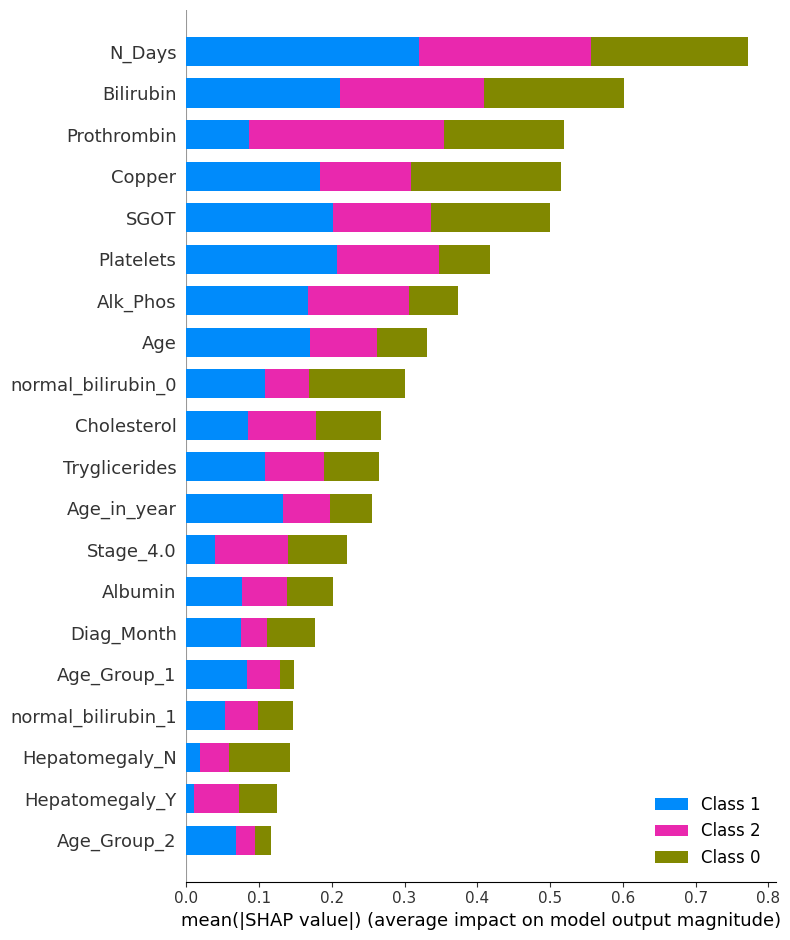

In [50]:
import shap

explainer = shap.Explainer(xgb_model)


shap_values = explainer.shap_values(X_train.iloc[:100, :])

# Summary plot of feature importance
shap.summary_plot(shap_values, X_train.iloc[:100, :])

## <a id="5.2"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">LGBM Classifier</p>   </span></font></center> 

# LightGBM

In [51]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier


lgbm_params = {'objective': 'multi_logloss', 
               'max_depth': 9, 'min_child_samples': 14, 
               'learning_rate': 0.034869481921747415, 
               'n_estimators': 274, 'min_child_weight': 9, 
               'subsample': 0.7717873512945741, 
               'colsample_bytree': 0.1702910221565107, 
               'reg_alpha': 0.10626128775335533, 
               'reg_lambda': 0.624196407787772, 
               'random_state': 42,        }

# folds
n_splits = 10

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []



for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    lgbm_model = LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train,y_train)

    y_val_pred_prob = lgbm_model.predict_proba(X_val)
    y_pred = lgbm_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

    cv_results.append(logloss)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.


Fold 1, Logarithmic Loss on Validation Set: 0.407582594147538
Fold 1, F1 Score on Validation Set: 0.8442201518967783
----------------------------------------------------------------------
Fold 2, Logarithmic Loss on Validation Set: 0.4189899027052695
Fold 2, F1 Score on Validation Set: 0.8297175088073219
----------------------------------------------------------------------
Fold 3, Logarithmic Loss on Validation Set: 0.41863982171490705
Fold 3, F1 Score on Validation Set: 0.8313488165826558
----------------------------------------------------------------------
Fold 4, Logarithmic Loss on Validation Set: 0.43594270158028314
Fold 4, F1 Score on Validation Set: 0.8396714850150209
----------------------------------------------------------------------
Fold 5, Logarithmic Loss on Validation Set: 0.4404572558712237
Fold 5, F1 Score on Validation Set: 0.8288837955416818
----------------------------------------------------------------------
Fold 6, Logarithmic Loss on Validation Set: 0.41309849

## <a id="5.4"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Catboost Classifier</p>   </span></font></center> 

# CatBoost

In [52]:
from catboost import CatBoostClassifier
catboost_params = {'iterations': 469,
                   'depth': 20, 
                   'min_data_in_leaf': 11,
                   'learning_rate': 0.13812945166006543, 
                   'grow_policy': 'Lossguide',
                   'bootstrap_type' : 'Bernoulli'}

n_splits = 10

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    cat_model = CatBoostClassifier(**catboost_params, 
                            random_state=42, verbose =0
                           )
    cat_model.fit(X_train,y_train)

    y_val_pred_prob = cat_model.predict_proba(X_val)
    y_pred = cat_model.predict(X_val)
        
    f1=  f1_score(y_val, y_pred, average='weighted')

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-'*70)

 
    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')


Fold 1, Logarithmic Loss on Validation Set: 0.4294159822987961
Fold 1, F1 Score on Validation Set: 0.829564801236823
----------------------------------------------------------------------
Fold 2, Logarithmic Loss on Validation Set: 0.4395246896258767
Fold 2, F1 Score on Validation Set: 0.8373451116666651
----------------------------------------------------------------------
Fold 3, Logarithmic Loss on Validation Set: 0.45048825941789394
Fold 3, F1 Score on Validation Set: 0.8165747797317787
----------------------------------------------------------------------
Fold 4, Logarithmic Loss on Validation Set: 0.46248381226620544
Fold 4, F1 Score on Validation Set: 0.8234803441719895
----------------------------------------------------------------------
Fold 5, Logarithmic Loss on Validation Set: 0.44875218045390364
Fold 5, F1 Score on Validation Set: 0.8210401013095827
----------------------------------------------------------------------
Fold 6, Logarithmic Loss on Validation Set: 0.4363106

## <a id="5.6"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Ensemble of XGB, CATBOOST and LGBM</p>   </span></font></center> 

# Ensemble

In [53]:
from sklearn.ensemble import VotingClassifier

Ensemble = VotingClassifier(estimators = [('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)], 
                            voting='soft',
                            weights = [0.35,0.50,0.15]   #Adjust weighting since XGB performs better in local environment
                            )
Ensemble.fit(X, y_encoded)


VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(colsample_bytree=0.1702910221565107,
                                             learning_rate=0.034869481921747415,
                                             max_depth=9, min_child_samples=14,
                                             min_child_weight=9,
                                             n_estimators=274,
                                             objective='multi_logloss',
                                             random_state=42,
                                             reg_alpha=0.10626128775335533,
                                             reg_lambda=0.624196407787772,
                                             subsample=0.7717873512945741)),
                             ('xgb',
                              XGBClassifier(base_s...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None, min_child_weight=8,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=225, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x78245a63fc10>)],
                 voting='soft', weights=[0.35, 0.5, 0.15])

## <a id="6"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color:#581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Model Inference</p>   </span></font></center> 

# Model Inference

## <a id="6.1"><center><font size = 4><span style="color:#F5F5E6"> <p style="background-color: #581845;font-family:courier;color:#FFFFFF;font-size:250%;text-align:center;border-radius:5px 5px;padding : 2px">Feature Importance</p>   </span></font></center> 

# Feature Importance

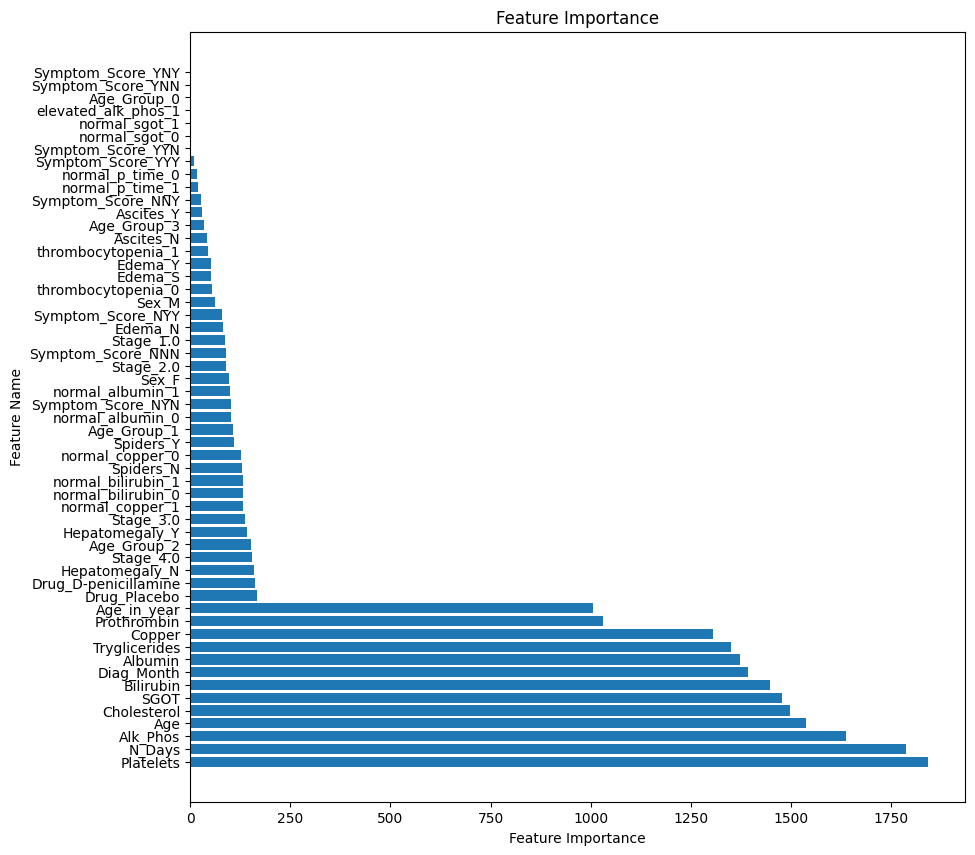

In [54]:
import matplotlib.pyplot as plt
feature_importances = lgbm_model.feature_importances_
feature_names = train_df_1.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

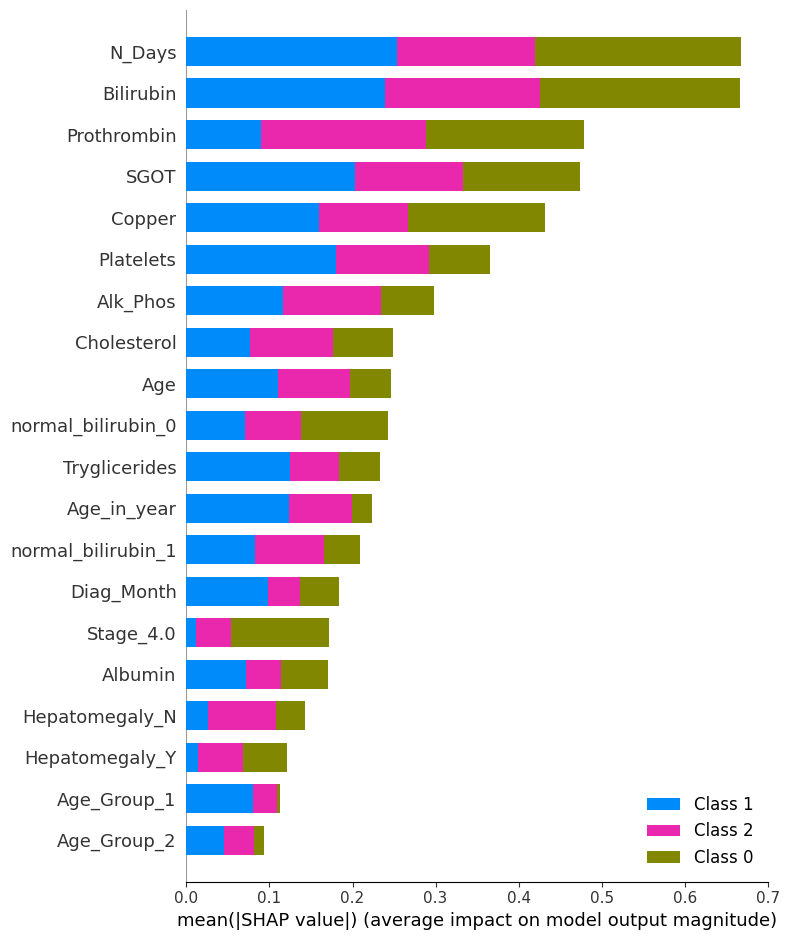

In [55]:
import shap

explainer = shap.Explainer(lgbm_model)


shap_values = explainer.shap_values(X_train.iloc[:100, :])

# Summary plot of feature importance
shap.summary_plot(shap_values, X_train.iloc[:100, :])

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Drug_D-penicillamine  5271 non-null   int64  
 1   Drug_Placebo          5271 non-null   int64  
 2   Sex_F                 5271 non-null   int64  
 3   Sex_M                 5271 non-null   int64  
 4   Ascites_N             5271 non-null   int64  
 5   Ascites_Y             5271 non-null   int64  
 6   Hepatomegaly_N        5271 non-null   int64  
 7   Hepatomegaly_Y        5271 non-null   int64  
 8   Spiders_N             5271 non-null   int64  
 9   Spiders_Y             5271 non-null   int64  
 10  Edema_N               5271 non-null   int64  
 11  Edema_S               5271 non-null   int64  
 12  Edema_Y               5271 non-null   int64  
 13  Stage_1.0             5271 non-null   int64  
 14  Stage_2.0             5271 non-null   int64  
 15  Stage_3.0            

# Final Submission

In [57]:
y_pred = Ensemble.predict_proba(test_df)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Status_C', 'Status_CL','Status_D']
y_pred.head()

,Status_C,Status_CL,Status_D
0,0.406424,0.022948,0.570627
1,0.535012,0.292085,0.172903
2,0.029367,0.021160,0.949473
3,0.977119,0.002901,0.019980
4,0.900823,0.024097,0.075080


In [58]:
submission_df = pd.DataFrame()
submission_df = y_pred  
submission_df['id'] = ids
submission_df['id'] = submission_df['id'].apply(lambda x : int(x))
submission_df.head()

,Status_C,Status_CL,Status_D,id
0,0.406424,0.022948,0.570627,7905
1,0.535012,0.292085,0.172903,7906
2,0.029367,0.021160,0.949473,7907
3,0.977119,0.002901,0.019980,7908
4,0.900823,0.024097,0.075080,7909


In [59]:
submission_df.to_csv('submission.csv', index= False)